首先导入 sympy 包

In [1]:
import sympy

设置打印环境，以顺利输出符号

In [9]:
sympy.init_printing()

比较常用的符号(虚数单位 $\mathrm i$, 圆周率 $\pi$ 和无穷 $\infty$)

In [10]:
from sympy import I, pi, oo

In [13]:
pi,oo,I

一些演示

In [4]:
I

In [5]:
pi

In [16]:
oo

In [15]:
print(oo)

oo


# 1.形式符号的定义

In [20]:
x 

NameError: name 'x' is not defined

In [19]:
print(x)

NameError: name 'x' is not defined

创建一个名为 x 的形式符号

In [22]:
x = sympy.Symbol("x")

In [23]:
x

In [24]:
print(x)

x


In [25]:
type(x)

sympy.core.symbol.Symbol

可以用任意字符串来定义一个形式变量. 这里等号左边是这个形式变量的名称，而这个形式变量的内容则是输入的字符串.

In [30]:
y = sympy.Symbol("Jupyternotebook")

In [31]:
y

In [33]:
print(y)

Jupyternotebook


字符串可以包含中文，不过似乎字体显示上会遇到一些问题.

In [34]:
z = sympy.Symbol("好")

In [35]:
z

Font 'rm' does not have a glyph for '\u597d' [U+597d], substituting with a dummy symbol.


In [37]:
print(z)

好


# 2.设置形式符号的类型

形式符号可以作为真实数值的容器. 可以设置这个容器所能容纳的变量类型.

In [20]:
test  = sympy.Symbol("number",real=True) #指定为实数类型
test.is_real

True

In [21]:
x.is_real is None #未明确指定类型的形式变量，其变量类型不确定.

True

可选的变量类型

In [22]:
%%html
<img src='Sympy演示_1.png'>

# 3.形式符号的数学运算

sympy 可以对形式符号进行一些数学运算，并且支持表达式化简功能.

In [40]:
y = sympy.Symbol("zu")

In [41]:
y**2

In [39]:
sympy.sqrt(y**2)

In [42]:
u = sympy.Symbol("u",positive=True)
sympy.sqrt(u**2)

In [43]:
sympy.log(sympy.exp(u)) #对数和指数的化简

In [44]:
sympy.sin(u + 2*pi) #支持三角恒等式化简

In [54]:
n = sympy.Symbol("n",even=True)
sympy.cos(n*pi) #由于 n 为偶数类型，因此 cos(n\pi) = 1

In [28]:
m = sympy.Symbol("m",integer=True)
sympy.cos(m*pi) # m 为整数类型，因此 cos(m\pi) = (-1)^m.

In [45]:
t = sympy.Symbol("27y") #用包含数字的字符串来定义形式符号是一个不好的习惯，因为很容易将形式符号中的数字与真正的数值搞混.

In [46]:
2*t #这里的乘号提醒我们 27 是形式符号的一部分，而不是数值变量.

In [31]:
%%markdown
# 4. 同时创建多个形式变量

# 4. 同时创建多个形式变量


In [47]:
a,b,c = sympy.symbols("A,B,C",positive=True) #多个符号的字符串用逗号分隔.
a,b,c

In [33]:
%%markdown
# 5. Sympy 中的数值

# 5. Sympy 中的数值


Sympy 中的数值变量在初始化时就会被赋值，而形式变量在初始化时则并不会赋值，这是二者的一个区别.
一般的数字与形式符号进行运算时，会自动被转换为具有正确类型的 sympy 变量.

In [48]:
c = 2*a
type(c) #c 是一个乘法表达式.

sympy.core.mul.Mul

In [50]:
d = 2*a/2 #表达式化简为 a.
type(d)
d

直接创建数值类型的变量的方法

In [51]:
i = sympy.Integer(20)
j = sympy.Float(0.1)
i,j

也可以输入一个数，让 sympy 自动判定其类型并创建相应的数值变量.

In [53]:
i = sympy.sympify(2021)
type(i)

sympy.core.numbers.Integer

In [38]:
i*20 #定义好的数值可以直接参与算术运算. i*20 得到的结果仍为 sympy.core.numbers.Integer 类型

In [55]:
type(i*20),type(n*20) #对于形式符号 n，表达式 n*20 是 sympy.core.mul.Mul 类型.

(sympy.core.numbers.Integer, sympy.core.mul.Mul)

In [40]:
j = sympy.sympify(-0.9)
type(j)

sympy.core.numbers.Float

is_integer 与 is_Integer 有所不同，后者只对于明确以 sympy.Integer 方式定义的数值为 True.

In [41]:
n.is_integer,n.is_Integer

(True, False)

In [57]:
import numpy as np
#np.sin(i)
sympy.sin(i) # Sympy 中的数值类型不能作为 numpy 函数的输入值.

sympy 中的一些数学常数

In [43]:
sympy.E,sympy.pi,sympy.EulerGamma,sympy.I,sympy.oo

In [64]:
type(sympy.E) #数学常数具有专属的类型.

sympy.core.numbers.Exp1

In [60]:
sympy.E.evalf(3) #要显示数学常数的值，可以调用 evalf 方法. evalf 方法所接受的参数为显示的有效数字位数. 
#这个表达式的结果是一个 sympy.core.numbers.Float 类型的变量，即一个 sympy 数值变量.

In [46]:
%%markdown
# 6.定义一个函数

# 6.定义一个函数


定义一个关于形式变量 x,y,z 的函数

In [61]:
x,y,z = sympy.symbols("x,y,z")
f = sympy.Function("f")(x,y,z) #调用 sympy.Function 模块，创造出一个函数原型，并指定自变量 x,y,z
f

In [62]:
f.free_symbols # free_symbols 属性给出了函数的自变量.

要定义函数的具体映射内容，即函数体，需要定义 sympy.Function 的一个子类. 不过 sympy 内置了许多数学函数，一般足够使用. sympy 的数学函数的值域为 sympy 形式符号和数值变量.

In [63]:
sympy.sin(pi),sympy.exp(1) # sympy 内置数学函数的返回值类型为 sympy.core.numbers.xxx 类型.

除了定义 sympy.Function 的一个子类，一个更加简便的定义数学函数的办法是将一个形式表达式转化为一个函数.

In [73]:
expr = x * y #关于形式符号 x 和 y 的一个算术表达式
expr_func = sympy.lambdify(y,expr) #将表达式变为一个关于自变量 y 的函数

In [71]:
expr_func(1,2)

In [72]:
expr_function_1 = sympy.lambdify((x,y),expr) #也可以将 expr 变为一个关于 x,y 两个变量的多元函数. 
expr_function_1(10,20)

sympy 数学函数可以接受 numpy 的 array 对象，返回一个(由 sympy 的符号变量和数值变量组成的) array 对象.

In [74]:
import numpy as np
temp = np.array([1,2,3,4,5])
expr_func(temp),type(expr_func(temp)[0])

(array([x, 2*x, 3*x, 4*x, 5*x], dtype=object), sympy.core.symbol.Symbol)

In [54]:
%%markdown
# 7.化简表达式

# 7.化简表达式


除了 sympy 的自动化简功能外，还可以使用 sympy 的 simplify 方法来化简符号表达式.

In [76]:
expr = x**2 + 2*x  + x +  1
expr,sympy.simplify(expr) #返回一个新的表达式，原表达式保持不变. 这里合并了同类项.

In [78]:
expr = sympy.sin(x)**2 + sympy.cos(x)**2
expr,sympy.simplify(expr)

sympy.expand 方法可以展开符号表达式

In [79]:
sympy.sin(x+y+z).expand(trig=True) #这里 trig = True 表明是三角函数展开

In [80]:
a,b = sympy.symbols("a,b",positive=True)
sympy.log(a**2*b**4).expand(log=True)

sympy.factor 可以对代数表达式进行因式分解.

In [81]:
expr = sympy.exp(x) + sympy.exp(x)*sympy.exp(y)
expr.factor()

In [86]:
expr  = x**4  - 16.0
expr.factor()

In [87]:
%%markdown 
# 8. 变量代换和表达式的赋值

# 8. 变量代换和表达式的赋值


可以通过 sympy.subs 方法来替换符号表达式中的变量. 特别地，这提供了将符号表达式转换为函数之外的另一个直接给表达式赋值的方法.

In [89]:
expr = x*y #一个符号表达式
values = {x:23} #变量替换可以写成一个字典的形式.
expr.subs(values),expr #这里进行了部分变量的替换，即把 x 替换为数值变量 23. 原来的表达式不受影响.

In [91]:
expr.subs({x:20,y:10}) #通过将变量替换为数值，完成对表达式的赋值. 这里的结果是一个 sympy.core.numbers.xxx 对象.不是 python 的 int 类型.

In [94]:
np.sin(float(expr.subs({x:20,y:10})))

In [95]:
expr_1 = sympy.exp(x+y)
expr_1.subs({sympy.exp:sympy.sin}) # subs 方法也可以替换表达式中的 sympy 函数.

In [96]:
expr_2 = sympy.exp(x+y) + sympy.sin(x)
expr_2.subs({sympy.exp(x+y):z**2+z}),expr_2 #最一般的替换就是把表达式的一个子表达式替换为其他表达式.

In [97]:
%%markdown
# 9. 微积分

# 9. 微积分


对 sympy 数学函数进行求导

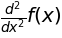

In [99]:
x = sympy.Symbol("x")
f = sympy.Function("f")(x)
sympy.diff(f,x,2) #对抽象函数的求导, sympy.diff(f,x,x) 与 sympy.diff(f,x,2) 等价，都是求二阶导数

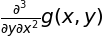

In [100]:
g = sympy.Function("g")(x,y)
sympy.diff(g,x,y,x) #依次对 x,y,x 求偏导数. 这里其实 sympy 假设了混合偏导数可以交换位置.

In [101]:
sympy.diff(sympy.sin(x),x) #对 sympy 内置数学函数求导

In [104]:
expr = x**2 * y + y**2 + x * sympy.exp(z)
sympy.diff(expr,x,y) #直接对符号表达式求导

定积分和不定积分

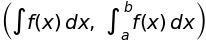

In [105]:
sympy.integrate(f,x), sympy.integrate(f,(x,a,b)) #对抽象函数的不定积分和定积分

In [72]:
sympy.integrate(expr,x), sympy.integrate(expr,(x,0,1)) #直接对符号表达式进行不定积分和定积分.

In [73]:
sympy.integrate(expr,x,y,z) #累次积分. 这里依次对 x,y,z 进行积分.

sympy.series 方法可以对数学函数进行泰勒展开.

In [137]:
sympy.series(expr,z,n=3).removeO() #对 z 进行泰勒展开，展开到 z 的三次项. 可以用 remove0 方法去除最后的 O 符号.

In [108]:
sympy.series(f,x,n=4) #抽象函数的泰勒展开. 

                             ⎛  2      ⎞│         ⎛  3      ⎞│           
                           2 ⎜ d       ⎟│       3 ⎜ d       ⎟│           
                          x ⋅⎜───(f(x))⎟│      x ⋅⎜───(f(x))⎟│           
                             ⎜  2      ⎟│         ⎜  3      ⎟│           
         ⎛d       ⎞│         ⎝dx       ⎠│x=0      ⎝dx       ⎠│x=0    ⎛ 4⎞
f(0) + x⋅⎜──(f(x))⎟│    + ────────────────── + ────────────────── + O⎝x ⎠
         ⎝dx      ⎠│x=0           2                    6                 

sympy.Sum 方法可以表示形式级数.

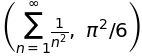

In [110]:
n = sympy.symbols("n", integer=True)
x = sympy.Sum(1/(n**2), (n, 1, oo)) #级数
x, x.doit() #doit 方法可以把一个形式运算给出具体数值.

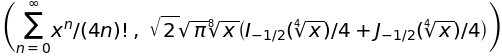

In [113]:
x = sympy.Symbol("x")
y = sympy.Sum((1/sympy.factorial(4*n))*x**n,(n,0,oo))
y, y.doit() #也可以对计算函函数项级数的和.

In [114]:
%%markdown
# 10.解方程(sympy 的应用价值)

# 10.解方程(sympy 的应用价值)


一个符号表达式就可以给出一个方程. 可以使用 sympy.solve 方法来解各种方程.

In [115]:
#代数方程
x,y = sympy.symbols("x,y")
eq = x**2 + x + 1
sympy.solve(eq,x)

In [118]:
#代数方程组
eq1 = x**2 + y + 1
eq2 = x + 2*y + 10
sympy.solve([eq1,eq2],[x,y],dict=True) # dict = True 保证每个解以字典的形式给出.

In [126]:
#超越方程(必须有封闭解(解析解)才行，水平有限，不是数值计算，而是符号运算)
eq3 = sympy.exp(x) + sympy.log(x)  + x - 10
sympy.solve(eq3,x)

NotImplementedError: multiple generators [x, exp(x), log(x)]
No algorithms are implemented to solve equation x + exp(x) + log(x) - 10

In [131]:
%%time
#常微分方程(似乎失败了)
f = sympy.Function("f")(x)
E = sympy.Symbol("E",real=True)
eq4 =  f.diff(x,2) + (E - x**2)*f #一维量子谐振子能量本征态问题
sympy.dsolve(eq4,f)

Wall time: 515 ms


Wall time: 980 ms


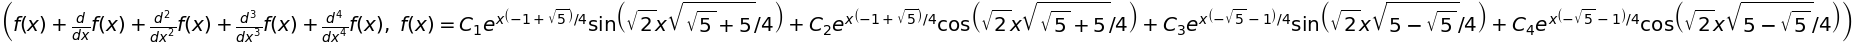

In [135]:
%%time
#线性常微分方程
x = sympy.Symbol("x")
eq5 = f.diff(x,4) + f.diff(x,3) + f.diff(x,2) + f.diff(x,1) +  f 
eq5,sympy.dsolve(eq5,f)